## NLP Mini Project 


## Spam Filtering using NLP

In [1]:
import sys
import nltk
import sklearn
import pandas
import numpy
import re

## Dataset is taken from https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [2]:
import pandas as pd
import numpy as np


df = pd.read_table('SMSSPamCollection', header=None, encoding='utf-8')



print(df.head())



      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
classes = df[0]
print(classes.value_counts())

ham     4825
spam     747
Name: 0, dtype: int64


## Preprocessing


In [4]:
from sklearn.preprocessing import LabelEncoder

# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

print(Y[:10])

[0 0 1 0 0 1 0 0 1 1]


In [5]:
text_messages = df[1]
print(text_messages[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: 1, dtype: object


## Preprocessing - using regex to clean data

In [6]:

# Replace email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')


processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')


processed = processed.str.replace(r'£|\$', 'moneysymb')
    

processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    

processed = processed.str.replace(r'\d+(\.\d+)?', 'number')


processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')


processed = processed.str.lower()
print(processed)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in number a wkly comp to win fa cup...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
5       freemsg hey there darling it s been number wee...
6       even my brother is not like to speak with me t...
7       as per your request melle melle oru minnaminun...
8       winner as a valued network customer you have b...
9       had your mobile number months or more u r enti...
10      i m gonna be home soon and i don t want to tal...
11      six chances to win cash from number to number ...
12      urgent you have won a number week free members...
13      i ve been searching for the right words to tha...
14                      i have a date on sunday with will
15      xxxmobilemovieclub to use your credit click th...
16                                 oh k i m watching here
17      eh u r

## Removing stop words and performing Stemming

In [7]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))
print(processed[0])

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


## Performing tokenization and Generating features 

In [8]:
from nltk.tokenize import word_tokenize

# bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [9]:
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 6574
Most common words: [('number', 2759), ('u', 1207), ('call', 674), ('go', 456), ('get', 451), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 304), ('moneysymbnumb', 303), ('ok', 293), ('free', 284), ('day', 276), ('know', 275), ('love', 266)]


In [10]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [11]:
# Determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

go
jurong
point
crazi
avail
bugi
n
great
world
la
e
buffet
cine
got
amor
wat


In [12]:
messages = list(zip(processed, Y))
seed = 1
np.random.seed = seed
np.random.shuffle(messages)


featuresets = [(find_features(text), label) for (text, label) in messages]


x = []
y = []
for tup in featuresets:
    x.append(tup[0])
    y.append(tup[1])



X = []
for row in x:
    temp = []
    for val in row.values():
        temp.append(val)
    X.append(temp)
    
print(X[0])


[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

In [13]:
temp = []
encoder = LabelEncoder()
for x in X:
    temp.append(encoder.fit_transform(x))
print(temp[0])

[0 0 0 ... 0 0 0]


In [16]:

from sklearn import model_selection


x_train,x_test,y_train,y_test = model_selection.train_test_split(temp, y, test_size = 0.25,random_state=seed)


## Training

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support


accuracy = {}


Accuracy: 98.77961234745155


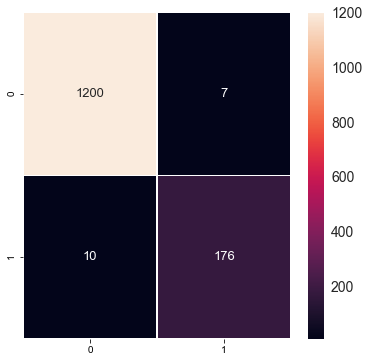

In [18]:
# Using Support Vector Classifier

from sklearn.svm import SVC
from sklearn import metrics
model = SVC(kernel = 'linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy:",acc)


accuracy['SVC'] = acc


cm2 = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.set(font_scale=1.4)
hmap = sns.heatmap(cm2, annot=True,annot_kws={"size": 13},linewidths = .5,ax=ax,fmt='g')
figure = hmap.get_figure()


Accuracy: 94.61593682699211


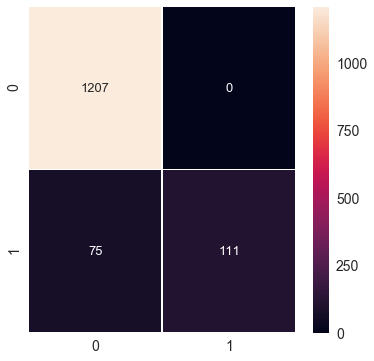

In [20]:
# Using K-Nearest Neighbors classifier

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy:",acc)

accuracy['KNN'] = acc

cm2 = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.set(font_scale=1.4)
hmap = sns.heatmap(cm2, annot=True,annot_kws={"size": 13},linewidths = .5,ax=ax,fmt='g')
figure = hmap.get_figure()


Accuracy: 97.91816223977028


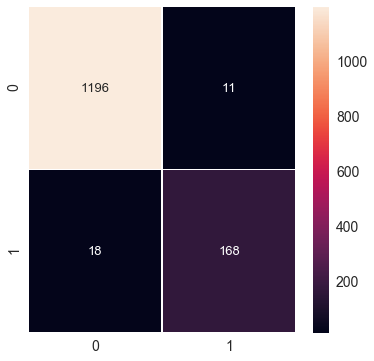

In [22]:
# Using DecsionTree classifier

from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)



acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy:",acc)

accuracy['DTC'] = acc


cm2 = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.set(font_scale=1.4)
hmap = sns.heatmap(cm2, annot=True,annot_kws={"size": 13},linewidths = .5,ax=ax,fmt='g')
figure = hmap.get_figure()



/Users/chintanpatel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy: 98.42067480258436


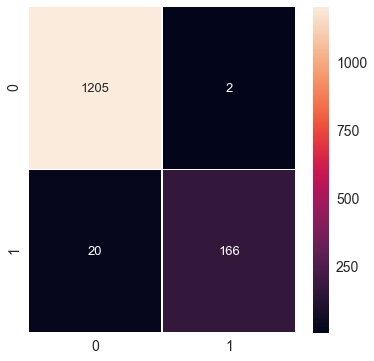

In [23]:
# Using Random Forest classifier

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)



acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy:",acc)

accuracy['RFC'] = acc


cm2 = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.set(font_scale=1.4)
hmap = sns.heatmap(cm2, annot=True,annot_kws={"size": 13},linewidths = .5,ax=ax,fmt='g')
figure = hmap.get_figure()



Accuracy: 99.21033740129216


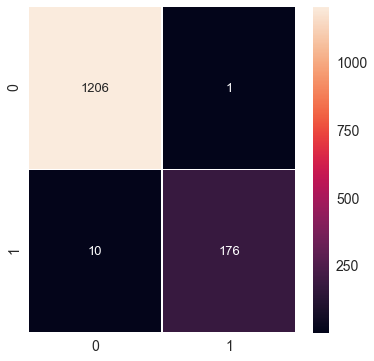

In [24]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy:",acc)

accuracy['LR'] = acc


cm2 = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.set(font_scale=1.4)
hmap = sns.heatmap(cm2, annot=True,annot_kws={"size": 13},linewidths = .5,ax=ax,fmt='g')
figure = hmap.get_figure()


Accuracy: 97.84637473079684


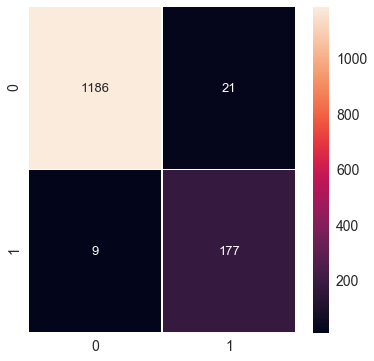

In [25]:
#using Naive Bayes

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy:",acc)

accuracy['NB'] = acc

cm2 = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.set(font_scale=1.4)
hmap = sns.heatmap(cm2, annot=True,annot_kws={"size": 13},linewidths = .5,ax=ax,fmt='g')
figure = hmap.get_figure()


## Finding the model with the highest accuracy

In [26]:
models = {
    'SVC' : SVC(kernel = 'linear'),
    'KNN' : KNeighborsClassifier(),
    'DTC' : DecisionTreeClassifier(),
    'RFC' : RandomForestClassifier(),
    'LR' : LogisticRegression(),
    'NB' : MultinomialNB() 
         }


In [27]:
temp = []
for key,values in accuracy.items():
    temp.append(values)
    
max_acc = max(temp)
for key, values in accuracy.items():
    if max_acc == values:
        model = models[key]
print(model)

model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
def testing(text):
    processed = re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+', 'emailaddress',text)


    processed = re.sub(r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+',
                                      'webaddress',processed)

  
    processed = re.sub(r'£|\$', 'moneysymb',processed)

  
    processed = re.sub(r'\s[0-9]{10}\s','phonenumber',processed)



    processed = re.sub(r'\d+(\.\d+)?', 'number', processed)



    processed = re.sub(r'[^\w\d\s]', ' ', processed)



    # Replace whitespace between terms with a single space
    processed = re.sub(r'\s+', ' ',processed)

    # Remove leading and trailing whitespace
    processed = re.sub(r'^\s+|\s+?$', '',processed)


    processed = processed.lower()



    text_tokens = word_tokenize(processed)

    processed = [word for word in text_tokens if not word in stopwords.words()]


    ps = nltk.PorterStemmer()
    test = []
    for w in processed:
        test.append(ps.stem(w))


    s = ' '

    processed = s.join(test)



    features = find_features(processed)

    test = []

    for val in features.values():
        test.append(val)


    test = np.array(test)

    test = np.reshape(test,(1,-1))

    y = model.predict(test)


    if y[0]==0:
        print("Not Spam")
    else : 
        print("Spam")



## Testing

In [30]:
text = input("Enter the test sentence: ")
testing(text)


Enter the test sentence: IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
Spam
